## Linear Transformation of an Image with PIL.Image
$Meringue$ 
$5/3/2017$

In [1]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (3.0, 3.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
## Translation
def cv2_Translate(img_dir,pixel_R,pixel_B):
    PIL_img_array = np.array(Image.open(img_dir))
    rows, cols = PIL_img_array.shape[:2]
    M = np.float32([[1,0,pixel_R],[0,1,pixel_B]])
    res = cv2.warpAffine(PIL_img_array,M,(rows,cols))
    return Image.fromarray(res)

In [3]:
## Rotation
def PIL_Rotate(img_dir, angle):
    PIL_img = Image.open(img_dir)
    return PIL_img.rotate(angle)

In [4]:
## Horizontal reflection
def PIL_Flip_LR(img_dir):
    PIL_img = Image.open(img_dir)
    return PIL_img.transpose(Image.FLIP_LEFT_RIGHT)

In [5]:
## Vertical reflection
def PIL_Flip_TB(img_dir):
    PIL_img = Image.open(img_dir)
    return PIL_img.transpose(Image.FLIP_TOP_BOTTOM)

In [6]:
## Brightness
def PIL_Enhance(img_dir,k):
    PIL_img = Image.open(img_dir)
    return PIL_img.point(lambda i:i*k)

In [7]:
## Affine
def cv2_Affine(img_dir,delta_pix,pts1 = np.float32([[0,0],[32,0],[0,32]])):
    PIL_img_array = np.array(Image.open(img_dir))
    rows, cols = PIL_img_array.shape[:2]
    pts2 = pts1+delta_pix
    M = cv2.getAffineTransform(pts1,pts2)
    res = cv2.warpAffine(PIL_img_array,M,(rows,cols))
    return Image.fromarray(res)

(-0.5, 359.5, 479.5, -0.5)

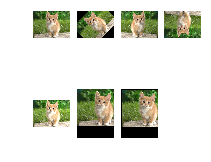

In [10]:
cat_dir = '/home/meringue/Softwares/caffe-master/examples/images/cat.jpg'
cat = Image.open(cat_dir)
cat_rotate = PIL_Rotate(cat_dir,45)
cat_flip_LR = PIL_Flip_LR(cat_dir)
cat_flip_TB = PIL_Flip_TB(cat_dir)
cat_enhance = PIL_Enhance(cat_dir,1.2)
cat_affine = cv2_Affine(cat_dir,4)
cat_translate = cv2_Translate(cat_dir,8,8)
plt.figure
plt.subplot(241)
plt.imshow(cat)
plt.axis('off')
plt.subplot(242)
plt.imshow(cat_rotate)
plt.axis('off')
plt.subplot(243)
plt.imshow(cat_flip_LR)
plt.axis('off')
plt.subplot(244)
plt.imshow(cat_flip_TB)
plt.axis('off')
plt.subplot(245)
plt.imshow(cat_enhance)
plt.axis('off')
plt.subplot(246)
plt.imshow(cat_affine)
plt.axis('off')
plt.subplot(247)
plt.imshow(cat_translate)
plt.axis('off')

[[ 1. -3.]
 [ 0. -4.]
 [-4. -5.]]


(-0.5, 31.5, 31.5, -0.5)

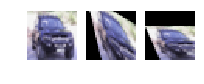

In [12]:
cat_dir = '/home/meringue/DataBase/cifar-10-batches-py/test/9_1.png'
cat = Image.open(cat_dir)
delta_pix = np.float32(np.random.randint(-6,6,[3,2]))
delta_pix1 = np.float32([[0,-10],[0,10],[10,0]])
delta_pix2 = np.float32([[0,10],[0,10],[10,0]])
print delta_pix
pts2 = np.float32([[-6,-6],[26,-6],[-6,26]])
cat_affine1 = cv2_Affine(cat_dir,delta_pix1)
cat_affine2 = cv2_Affine(cat_dir,delta_pix2)
plt.subplot(1,3,1)
plt.imshow(cat)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(cat_affine1)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(cat_affine2)
plt.axis('off')

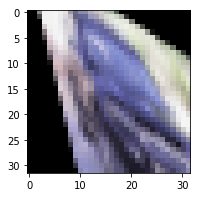

In [15]:
plt.imshow(np.asarray(cat_affine1))